# Defining Methods

In [1]:
import numpy as np
import copy
from prettytable import PrettyTable as ptbl

In [2]:
def JacobiMethod(a,x,B,N,E):
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)

    print("\n***** Jacobi Method *****")
    condition = True
    count = 0
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('X'+str(i+1))
    
    outputlist=[]

    accuracy = []

    while condition:

        X_new = np.zeros((n))
        for i in range(n):
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
        
        print(f'\niteration = {count}',end="\t")

        temp = []
        temp.append(count+1)    
        for i in range(n):
            print(f'   X{i+1} = {X_new[i]:.20f}', end = "\t")
            temp.append(X_new[i])
        print()
        
        outputlist.append(temp)

        accuracyReached = abs(X_new[i] - X[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X[i])) 
        
        a = []
        a.append((count+1))
        a.append(accuracyReached)

        accuracy.append(a)
        
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True
        
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)
    
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]}', end = "\t")
    print()
    return accuracy,table

In [3]:
def GaussSiedelMethod(a,x,B,N,E):
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    
    print("\n***** Gauss-Siedel Method *****")

    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('X'+str(i+1))
    
    outputlist=[]

    condition = True
    count = 0
    
    accuracy = []

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            
            for j in range (i):
                X[j] = copy.copy(X_new[j])
            
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
            
        temp = []
        temp.append(count+1)
        print(f'\niteration = {count}',end="\t")
        for i in range(n):
            print(f'  X{i+1} = {X_new[i]:.20f}', end = "\t")
            temp.append(X_new[i])
        print()
        
        outputlist.append(temp)
        
        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i])) 
        
        a = []
        a.append((count+1))
        a.append(accuracyReached)

        accuracy.append(a)
                
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True

    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)

    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]}', end = "\t")
    print()
    return accuracy, table

In [4]:
def SOR(a,x,B,N,E,W = 1.0):
    
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    w = copy.copy(W)

    accuracy = []
    print("\n***** Succesive Over Relaxation *****")

    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('X'+str(i+1))
    
    outputlist=[]
    
    condition = True
    count = 0

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            for j in range (i):
                X[j] = X_new[j]
            
            tmp = 0
            n = len(A)
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
    
            X_new[i] = (1-w)*X_prev[i] + w*((b[i] - tmp)/A[i][i])
            
        temp = []
        temp.append(count+1)
        print(f'\niteration = {count}',end="\t")
        for i in range(n):
            print(f'  X{i+1} = {X_new[i]:.20f}', end = "\t")
            temp.append(X_new[i])
        print()
        outputlist.append(temp)

        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i]))
        
             
        a = []
        a.append((count+1))
        a.append(accuracyReached)

        accuracy.append(a)
        
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)

    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]}', end = "\t")
    print()
    return accuracy, table

# Input Section


In [13]:
n = 3
# A = np.array([[-10.,-8.,0.],
#             [-8.,10.,-1.,],
#             [0.,-1.,10.]
#             ])

# b = np.array([-6.,9.,28.])

# A = np.array([[3.,-1.,1.],
#             [-1.,3.,-1.],
#             [1.,-1.,3]
#             ])

# b = np.array([
#     [-1.],
#     [7.],
#     [-7.]
# ])

A = np.array([[10.,-1.,0.],
            [-1.,10.,-2.],
            [0.,-2.,10.]
            ])
            
b = np.array([
    [9.],
    [7.],
    [6.]
])
# initial Guesses
X = np.array([0.,0.,0.])

# Reading tolerable error
e = 0.0001


# Reading relaxation factor
w = 7/10


n = int(input("Enter Number of Variables: "))

A = np.zeros((n,n))
print("Enter Co-efficient Matrix:")
for i in range(n):
    for j in range(n):
        A[i][j] = float(input(">"))

b = np.zeros((n))
print("Enter RHS: ")
for i in range(n):
    b[i] = float(input(">"))

X = np.zeros((n))
print("Enter Initial Guasses:")
for i in range(n):
    b[i] = float(input(">"))
    
e = float(input('Enter Accuracy: '))

# Calling Methods

In [14]:
jacobi, table = JacobiMethod(A,X,b,n,e)
jacobi_count = []
jacobi_accuracy = []
for i in jacobi:
        jacobi_count.append(i[0])
        jacobi_accuracy.append(i[1])
print(table)


***** Jacobi Method *****

iteration = 0	   X1 = 0.90000000000000002220	   X2 = 0.69999999999999995559	   X3 = 0.59999999999999997780	

iteration = 1	   X1 = 0.96999999999999997335	   X2 = 0.90999999999999992006	   X3 = 0.73999999999999999112	

iteration = 2	   X1 = 0.99099999999999999201	   X2 = 0.94499999999999995115	   X3 = 0.78200000000000002842	

iteration = 3	   X1 = 0.99450000000000005063	   X2 = 0.95550000000000001599	   X3 = 0.78899999999999992362	

iteration = 4	   X1 = 0.99555000000000004601	   X2 = 0.95724999999999993427	   X3 = 0.79109999999999991438	

iteration = 5	   X1 = 0.99572499999999997122	   X2 = 0.95777500000000004299	   X3 = 0.79144999999999998685	

iteration = 6	   X1 = 0.99577749999999998209	   X2 = 0.95786249999999983906	   X3 = 0.79155500000000000860	

iteration = 7	   X1 = 0.99578624999999987288	   X2 = 0.95788875000000006654	   X3 = 0.79157250000000001222	

Solution: Iteration = 8
x1 = 0.9957862499999999	x2 = 0.9578887500000001	x3 = 0.7915725	
+-----------

In [15]:
gs,table = GaussSiedelMethod(A,X,b,n,e)

gs_count = []
gs_accuracy =[] 
for i in gs:
    gs_count.append(i[0])
    gs_accuracy.append(i[1])
print(table)


***** Gauss-Siedel Method *****

iteration = 0	  X1 = 0.90000000000000002220	  X2 = 0.79000000000000003553	  X3 = 0.75800000000000000711	

iteration = 1	  X1 = 0.97899999999999987033	  X2 = 0.94950000000000012168	  X3 = 0.78990000000000004654	

iteration = 2	  X1 = 0.99495000000000000107	  X2 = 0.95747499999999996501	  X3 = 0.79149500000000005961	

iteration = 3	  X1 = 0.99574750000000000760	  X2 = 0.95787374999999985725	  X3 = 0.79157474999999999365	

iteration = 4	  X1 = 0.99578737499999991911	  X2 = 0.95789368750000003505	  X3 = 0.79157873749999996260	

Solution: Iteration = 5
x1 = 0.9957873749999999	x2 = 0.9578936875	x3 = 0.7915787375	
+-----------+--------------------+--------------------+--------------------+
| Iteration |         X1         |         X2         |         X3         |
+-----------+--------------------+--------------------+--------------------+
|     1     |        0.9         |        0.79        |       0.758        |
|     2     | 0.9789999999999999 | 0.949500

In [16]:
w = 0.9

sor, table = SOR(A,X,b,n,e,w)
sor_count = []
sor_accuracy = []
for i in sor:
    sor_count.append(i[0])
    sor_accuracy.append(i[1])
print(table)


***** Succesive Over Relaxation *****

iteration = 0	  X1 = 0.81000000000000005329	  X2 = 0.70290000000000008029	  X3 = 0.66652200000000005886	

iteration = 1	  X1 = 0.95426099999999991486	  X2 = 0.90614744999999996544	  X3 = 0.76975874099999996858	

iteration = 2	  X1 = 0.98697937049999995285	  X2 = 0.94799946172499993668	  X3 = 0.78761577721049991219	

iteration = 3	  X1 = 0.99401788860525008840	  X2 = 0.95603239604486245362	  X3 = 0.79084740900912520178	

iteration = 4	  X1 = 0.99544470450456268296	  X2 = 0.95754579663153938096	  X3 = 0.79144298429458959099	

iteration = 5	  X1 = 0.99572359214729477817	  X2 = 0.95782944012943660450	  X3 = 0.79155359765275756789	

iteration = 6	  X1 = 0.99577700882637887325	  X2 = 0.95788252238481419454	  X3 = 0.79157421379454229182	

Solution: Iteration = 7
x1 = 0.9957770088263789	x2 = 0.9578825223848142	x3 = 0.7915742137945423	
+-----------+--------------------+--------------------+--------------------+
| Iteration |         X1         |         X

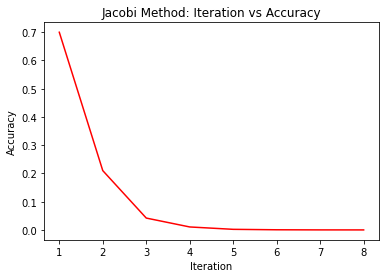

In [17]:
import matplotlib.pyplot as plt
plt.title("Jacobi Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(jacobi_count,jacobi_accuracy,color = 'red')
plt.show()

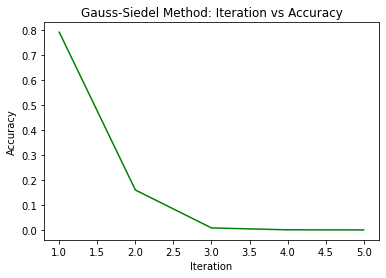

In [18]:
plt.title("Gauss-Siedel Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(gs_count,gs_accuracy,color = 'green')
plt.show()


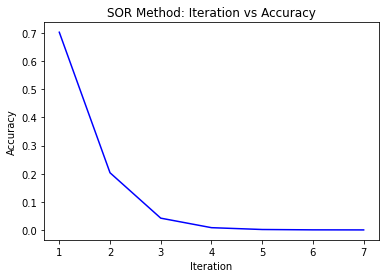

In [19]:
plt.title("SOR Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(sor_count,sor_accuracy,color = 'blue')
plt.show()

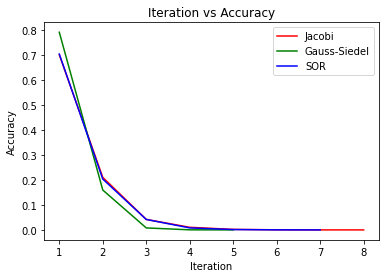

In [20]:
plt.title("Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(jacobi_count,jacobi_accuracy,color = 'red', label = 'Jacobi')
plt.plot(gs_count,gs_accuracy,color = 'green', label = 'Gauss-Siedel')
plt.plot(sor_count,sor_accuracy,color = 'blue', label = 'SOR')
plt.legend(loc="upper right")
plt.show()